# Temperature Prediction

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import pickle
import warnings
warnings.filterwarnings('ignore')

Importing All the necessary libraries.

# Reading and Understanding the Data

In [2]:
df = pd.read_csv('temperature.csv')
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


Here we read the CSV file in jupyter notebook.

In [3]:
df = pd.DataFrame(data=df)
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Here we are loading the dataset into DataFrame

In [4]:
df.sample(10)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
1517,18.0,29-08-2013,27.4,24.0,50.608196,92.536324,27.291280,23.250203,7.112928,88.787324,...,0.000000,0.005667,0.000000,37.4832,127.024,56.4448,1.2313,4475.678711,29.8,22.8
6822,23.0,24-07-2017,28.1,25.2,48.873089,88.673805,33.660871,25.426468,5.527132,83.897461,...,0.000000,4.638252,0.000000,37.5372,126.891,15.5876,0.1554,5559.503418,36.0,24.7
4081,7.0,08-08-2015,33.4,24.1,63.465889,93.057549,28.827759,23.942263,4.758843,111.524916,...,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,5197.706055,30.8,24.1
2442,18.0,04-08-2014,29.2,24.6,51.766251,90.872337,30.512649,24.885534,6.384129,112.976366,...,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5312.851563,30.5,25.2
1760,11.0,08-07-2014,29.4,23.8,51.295197,89.521713,34.166016,25.020295,5.261524,82.288916,...,0.000000,1.642818,0.539527,37.5372,127.085,28.7000,0.6233,5805.242676,33.4,25.3
5871,22.0,17-08-2016,34.1,26.5,49.532761,85.286415,33.306668,25.505380,4.734542,98.980946,...,0.000000,0.000000,0.170361,37.5102,127.086,21.9668,0.1332,4886.967285,35.0,26.9
291,17.0,11-07-2013,25.4,23.8,90.436440,96.993538,24.537425,22.482685,7.511015,34.464366,...,3.676672,3.010172,0.487405,37.6181,127.099,53.4712,0.6970,5780.668945,24.6,23.0
5034,10.0,15-07-2016,27.2,21.2,78.679970,92.642021,22.334556,19.213804,10.323873,57.864414,...,5.743190,1.126123,0.346691,37.4562,126.955,208.5070,5.1782,5719.606934,22.2,19.4
2082,8.0,21-07-2014,30.4,24.2,69.065727,91.072395,27.147530,23.865239,8.481861,23.383842,...,0.000000,0.008499,0.069484,37.4697,126.910,52.5180,1.5629,5623.221680,28.2,24.7
4248,24.0,14-08-2015,31.3,24.1,50.365265,79.006760,31.348556,25.430221,6.122525,50.987401,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.2223,5016.055176,31.5,25.4


Displaying 10 random samples of data to understand it more.

# Data Inspection

In [5]:
df.shape

(7752, 25)

There are 7752 rows and 25 columns in our dataset.

In [6]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

It gives us the list of column titles. Here 'Next_Tmax' and 'Next_Tmin' are our target variables.

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

In [7]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All the columns have continuous float values in it except for date.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


It gives us the name of the columns alongwith the non-null count , it's datatype and total memory usage.

In [9]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


It gives us the mean , standard deviation , median , minimum and maximum values of each column.

In [10]:
#Checking for Null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

There are null values in 20 columns. We will have to treat them using mean or median depending uopn their distribution and skewness.

<AxesSubplot:>

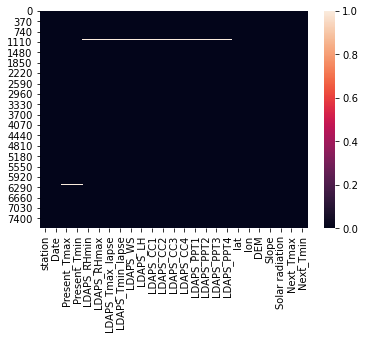

In [11]:
sn.heatmap(df.isnull())

Visual representation of having null values in the dataset. The white line represents the null value.

In [12]:
dfzscore=np.abs(zscore(df.drop(['Date'],axis=1)))
print(np.where(dfzscore>3))

(array([], dtype=int64), array([], dtype=int64))


There are no considerable outliers in the dataset. Hence it's not necessary to remove them.

In [13]:
df.skew()

station             0.000000
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
dtype: float64

There is skewness in our dataset which we will have to treat using power transformation.

# Exploratory Data Analysis

# Univariate Analysis

<AxesSubplot:xlabel='Next_Tmax'>

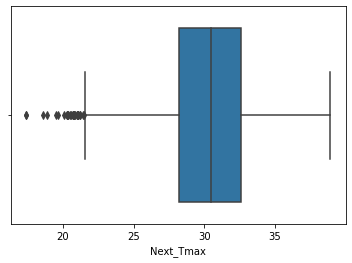

In [14]:
sn.boxplot(df['Next_Tmax'])

'Next_Tmax' is our target column  And it is very tightly distributed. There are only few outliers in 'Next_Tmax'.

<AxesSubplot:xlabel='Next_Tmin'>

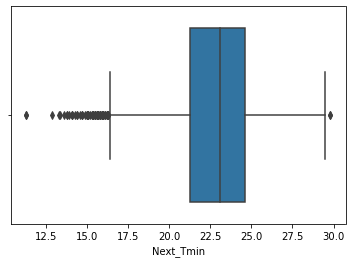

In [15]:
sn.boxplot(df['Next_Tmin'])

'Next_Tmin' is our target column And it is very tightly distributed. There are only few outliers in 'Next_Tmin'.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Density'>

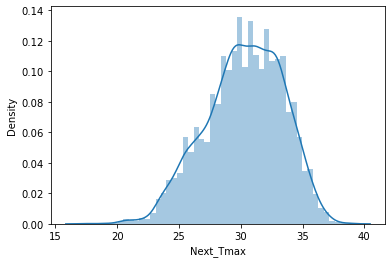

In [16]:
sn.distplot(df['Next_Tmax'])

This column has almost normal distribution. Or we can say a considerable amount of skewness it has.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Density'>

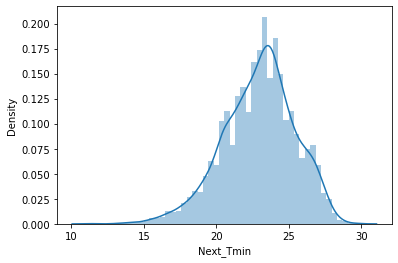

In [17]:
sn.distplot(df['Next_Tmin'])

This column has almost normal distribution. 

<AxesSubplot:xlabel='station', ylabel='Density'>

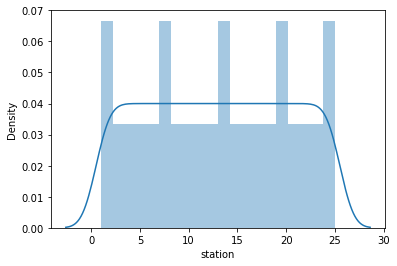

In [18]:
sn.distplot(df['station'])

This is a normalized data.

<AxesSubplot:xlabel='Present_Tmax', ylabel='Density'>

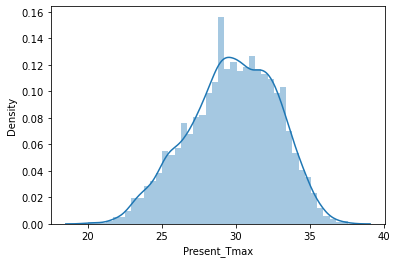

In [19]:
sn.distplot(df['Present_Tmax'])

"present_tmax" also has almost normalized distribution of the data.

<AxesSubplot:xlabel='Present_Tmin', ylabel='Density'>

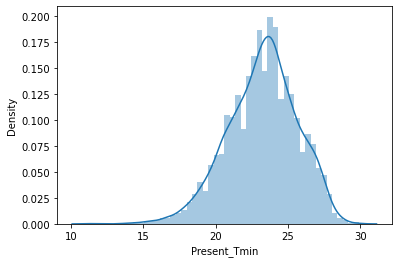

In [20]:
sn.distplot(df['Present_Tmin'])

'Present_Tmin' also has almost normalized distribution of the data.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='Density'>

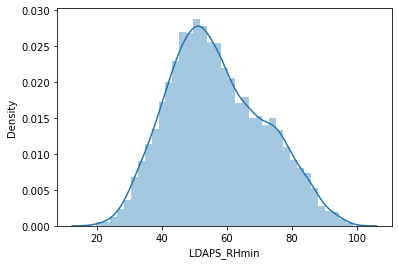

In [21]:
sn.distplot(df['LDAPS_RHmin'])

LDAPS_RHmin has almost normalized distribution of data.

<AxesSubplot:xlabel='LDAPS_RHmax', ylabel='Density'>

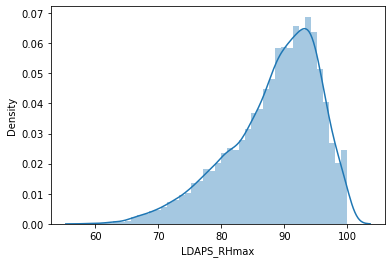

In [22]:
sn.distplot(df['LDAPS_RHmax'])

LDAPS_RHmax has a bit left skewness in the data.

<AxesSubplot:xlabel='LDAPS_Tmax_lapse', ylabel='Density'>

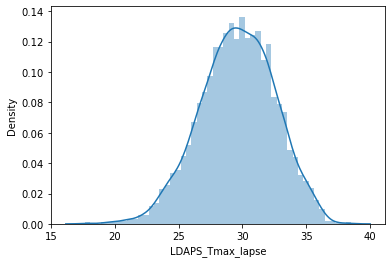

In [23]:
sn.distplot(df['LDAPS_Tmax_lapse'])

'LDAPS_Tmax_lapse' has normal data distribution.

<AxesSubplot:xlabel='LDAPS_Tmin_lapse', ylabel='Density'>

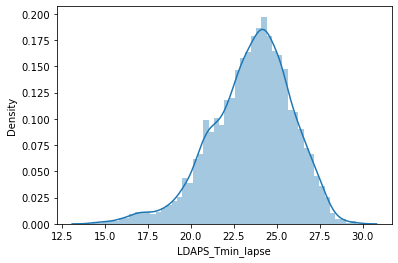

In [24]:
sn.distplot(df['LDAPS_Tmin_lapse'])

'LDAPS_Tmin_lapse' has almost normal data distribution.

<AxesSubplot:xlabel='LDAPS_WS', ylabel='Density'>

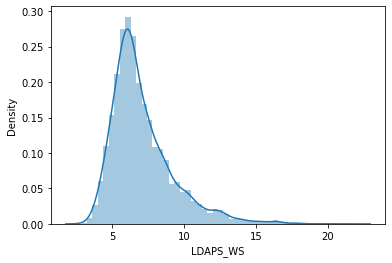

In [25]:
sn.distplot(df['LDAPS_WS'])

'LDAPS_WS' has almost normal distribution of the data.

<AxesSubplot:xlabel='LDAPS_LH', ylabel='Density'>

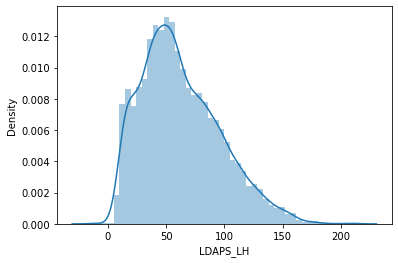

In [26]:
sn.distplot(df['LDAPS_LH'])

'LDAPS_LH' doesn't have normalized data.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Density'>

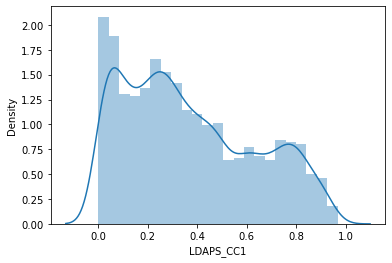

In [27]:
sn.distplot(df['LDAPS_CC1'])

'LDAPS_CC1' does not have normalized data.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Density'>

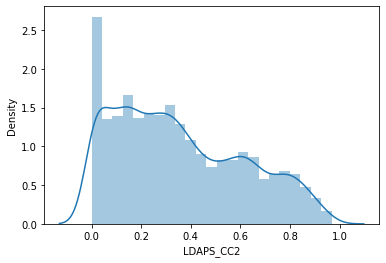

In [28]:
sn.distplot(df['LDAPS_CC2'])

'LDAPS_CC2' does not have normal distribution of the data.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Density'>

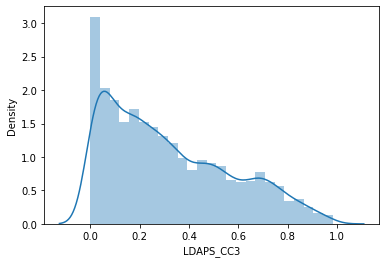

In [29]:
sn.distplot(df['LDAPS_CC3'])

'LDAPS_CC3' has right skewness in the data.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Density'>

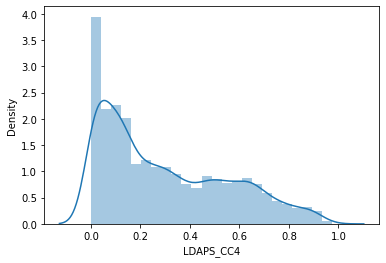

In [30]:
sn.distplot(df['LDAPS_CC4'])

'LDAPS_CC4' has right skewness in the data.

<AxesSubplot:xlabel='LDAPS_PPT1', ylabel='Density'>

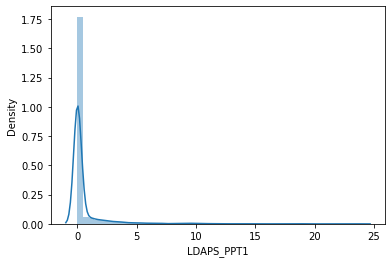

In [31]:
sn.distplot(df['LDAPS_PPT1'])

'LDAPS_PPT1' has a normal distribution.

<AxesSubplot:xlabel='LDAPS_PPT2', ylabel='Density'>

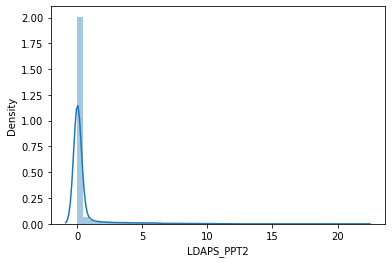

In [32]:
sn.distplot(df['LDAPS_PPT2'])

'LDAPS_PPT2' has normal distribution of the data.

<AxesSubplot:xlabel='LDAPS_PPT3', ylabel='Density'>

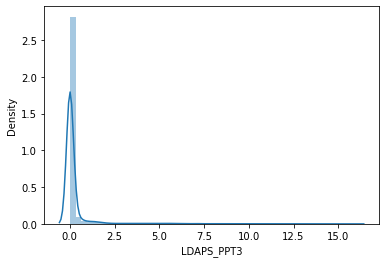

In [33]:
sn.distplot(df['LDAPS_PPT3'])

'LDAPS_PPT3' has normal distribution of the data.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='Density'>

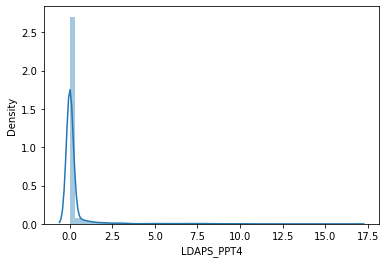

In [34]:
sn.distplot(df['LDAPS_PPT4'])

'LDAPS_PPT4' has normal distribution of the data.

<AxesSubplot:xlabel='lat', ylabel='Density'>

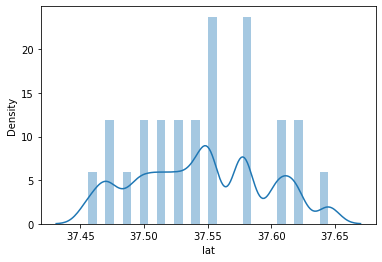

In [35]:
sn.distplot(df['lat'])

'lat' does not have normalized data.

<AxesSubplot:xlabel='lon', ylabel='Density'>

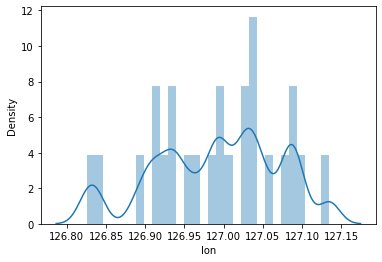

In [36]:
sn.distplot(df['lon'])

'lon' does not have normalized data.

<AxesSubplot:xlabel='DEM', ylabel='Density'>

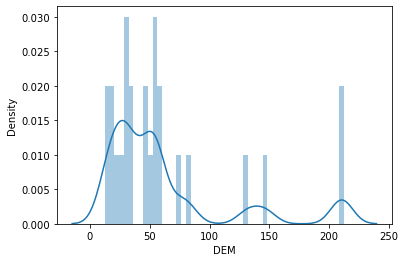

In [37]:
sn.distplot(df['DEM'])

'DEM' does not have normalized data.

<AxesSubplot:xlabel='Slope', ylabel='Density'>

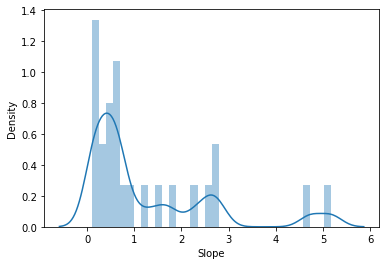

In [38]:
sn.distplot(df['Slope'])

'Slope' does not have normalized data.

<AxesSubplot:xlabel='Solar radiation', ylabel='Density'>

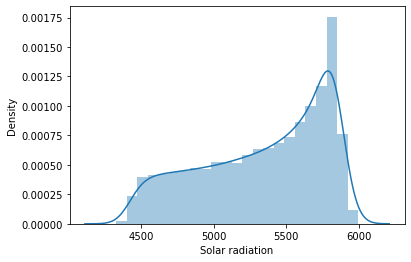

In [39]:
sn.distplot(df['Solar radiation'])

'Solar radiation' has left skewness in the data.

<AxesSubplot:xlabel='Next_Tmax', ylabel='Count'>

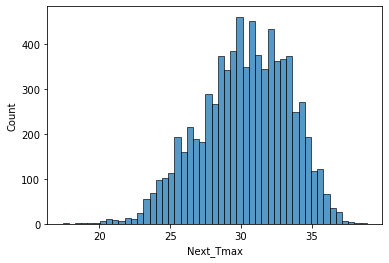

In [40]:
sn.histplot(df['Next_Tmax'])

The max temp in 'Next_Tmax' lies in the range 28-33 

<AxesSubplot:xlabel='Next_Tmin', ylabel='Count'>

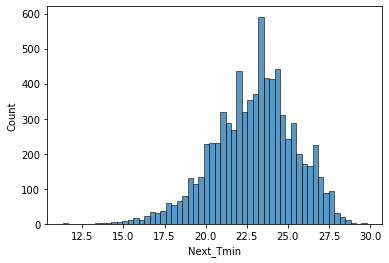

In [41]:
sn.histplot(df['Next_Tmin'])

Highest number of datas has min temp for 'Next_Tmin' marked in between 22.5 - 25.0

# Treating Null Values

In [42]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='median')
df['LDAPS_RHmax']=imp.fit_transform(df['LDAPS_RHmax'].values.reshape(-1,1))
df['LDAPS_LH']=imp.fit_transform(df['LDAPS_LH'].values.reshape(-1,1))
df['LDAPS_CC1']=imp.fit_transform(df['LDAPS_CC1'].values.reshape(-1,1))
df['LDAPS_CC2']=imp.fit_transform(df['LDAPS_CC2'].values.reshape(-1,1))
df['LDAPS_CC3']=imp.fit_transform(df['LDAPS_CC3'].values.reshape(-1,1))
df['LDAPS_CC4']=imp.fit_transform(df['LDAPS_CC4'].values.reshape(-1,1))

im=SimpleImputer(missing_values=np.nan ,strategy='mean')
df['LDAPS_RHmin']=im.fit_transform(df['LDAPS_RHmin'].values.reshape(-1,1))
df['LDAPS_WS']=im.fit_transform(df['LDAPS_WS'].values.reshape(-1,1))
df['station']=im.fit_transform(df['station'].values.reshape(-1,1))
df['Present_Tmax']=im.fit_transform(df['Present_Tmax'].values.reshape(-1,1))
df['Present_Tmin']=im.fit_transform(df['Present_Tmin'].values.reshape(-1,1))
df['LDAPS_Tmax_lapse']=im.fit_transform(df['LDAPS_Tmax_lapse'].values.reshape(-1,1))
df['LDAPS_Tmin_lapse']=im.fit_transform(df['LDAPS_Tmin_lapse'].values.reshape(-1,1))
df['Next_Tmax']=im.fit_transform(df['Next_Tmax'].values.reshape(-1,1))
df['LDAPS_PPT1']=im.fit_transform(df['LDAPS_PPT1'].values.reshape(-1,1))
df['LDAPS_PPT2']=im.fit_transform(df['LDAPS_PPT2'].values.reshape(-1,1))
df['LDAPS_PPT3']=im.fit_transform(df['LDAPS_PPT3'].values.reshape(-1,1))
df['LDAPS_PPT4']=im.fit_transform(df['LDAPS_PPT4'].values.reshape(-1,1))
df['Next_Tmin']=im.fit_transform(df['Next_Tmin'].values.reshape(-1,1))

imm=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Date']=imm.fit_transform(df['Date'].values.reshape(-1,1))

We have treated all the null values.

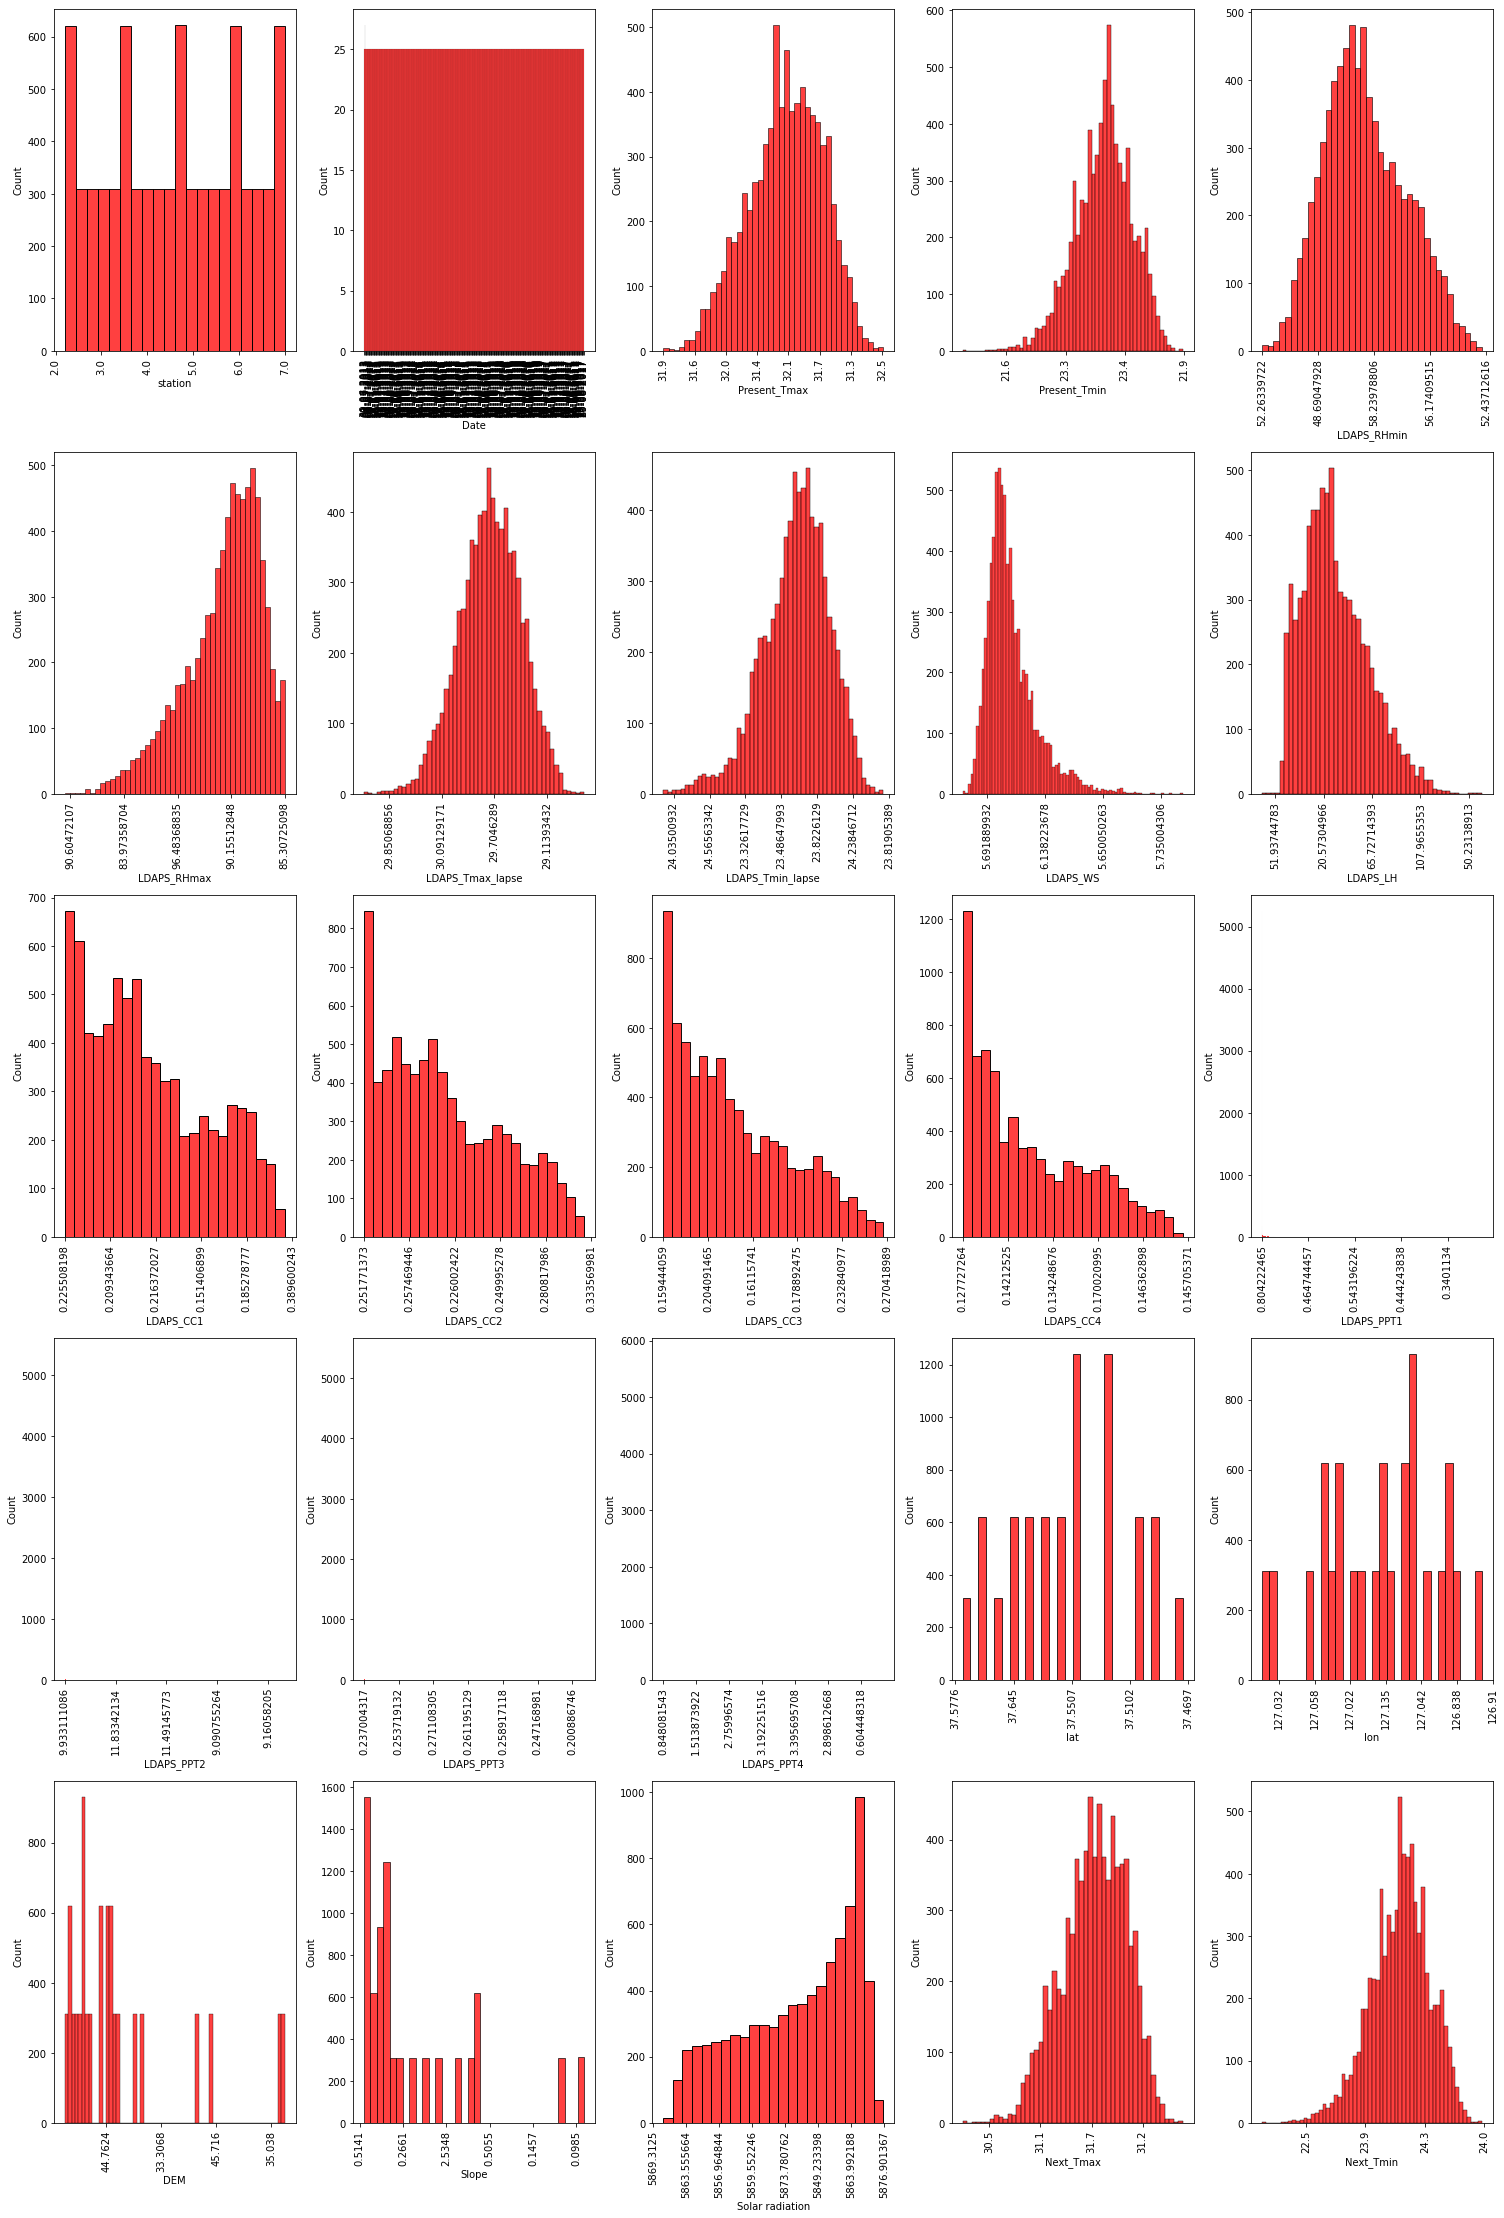

In [43]:
collist=df.columns.values
ncol=5
nrows=7
plt.figure(figsize=(3*nrows,6*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sn.histplot(data=df[collist[i]],color='red').set_xticklabels(labels=df[collist[i]].unique(),rotation=90)
    plt.tight_layout()

From the above graph study we can see that 'Date' is an unique attribute. And 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4' have only 0 values in it , so after a close study , we can drop all 5 columns. 

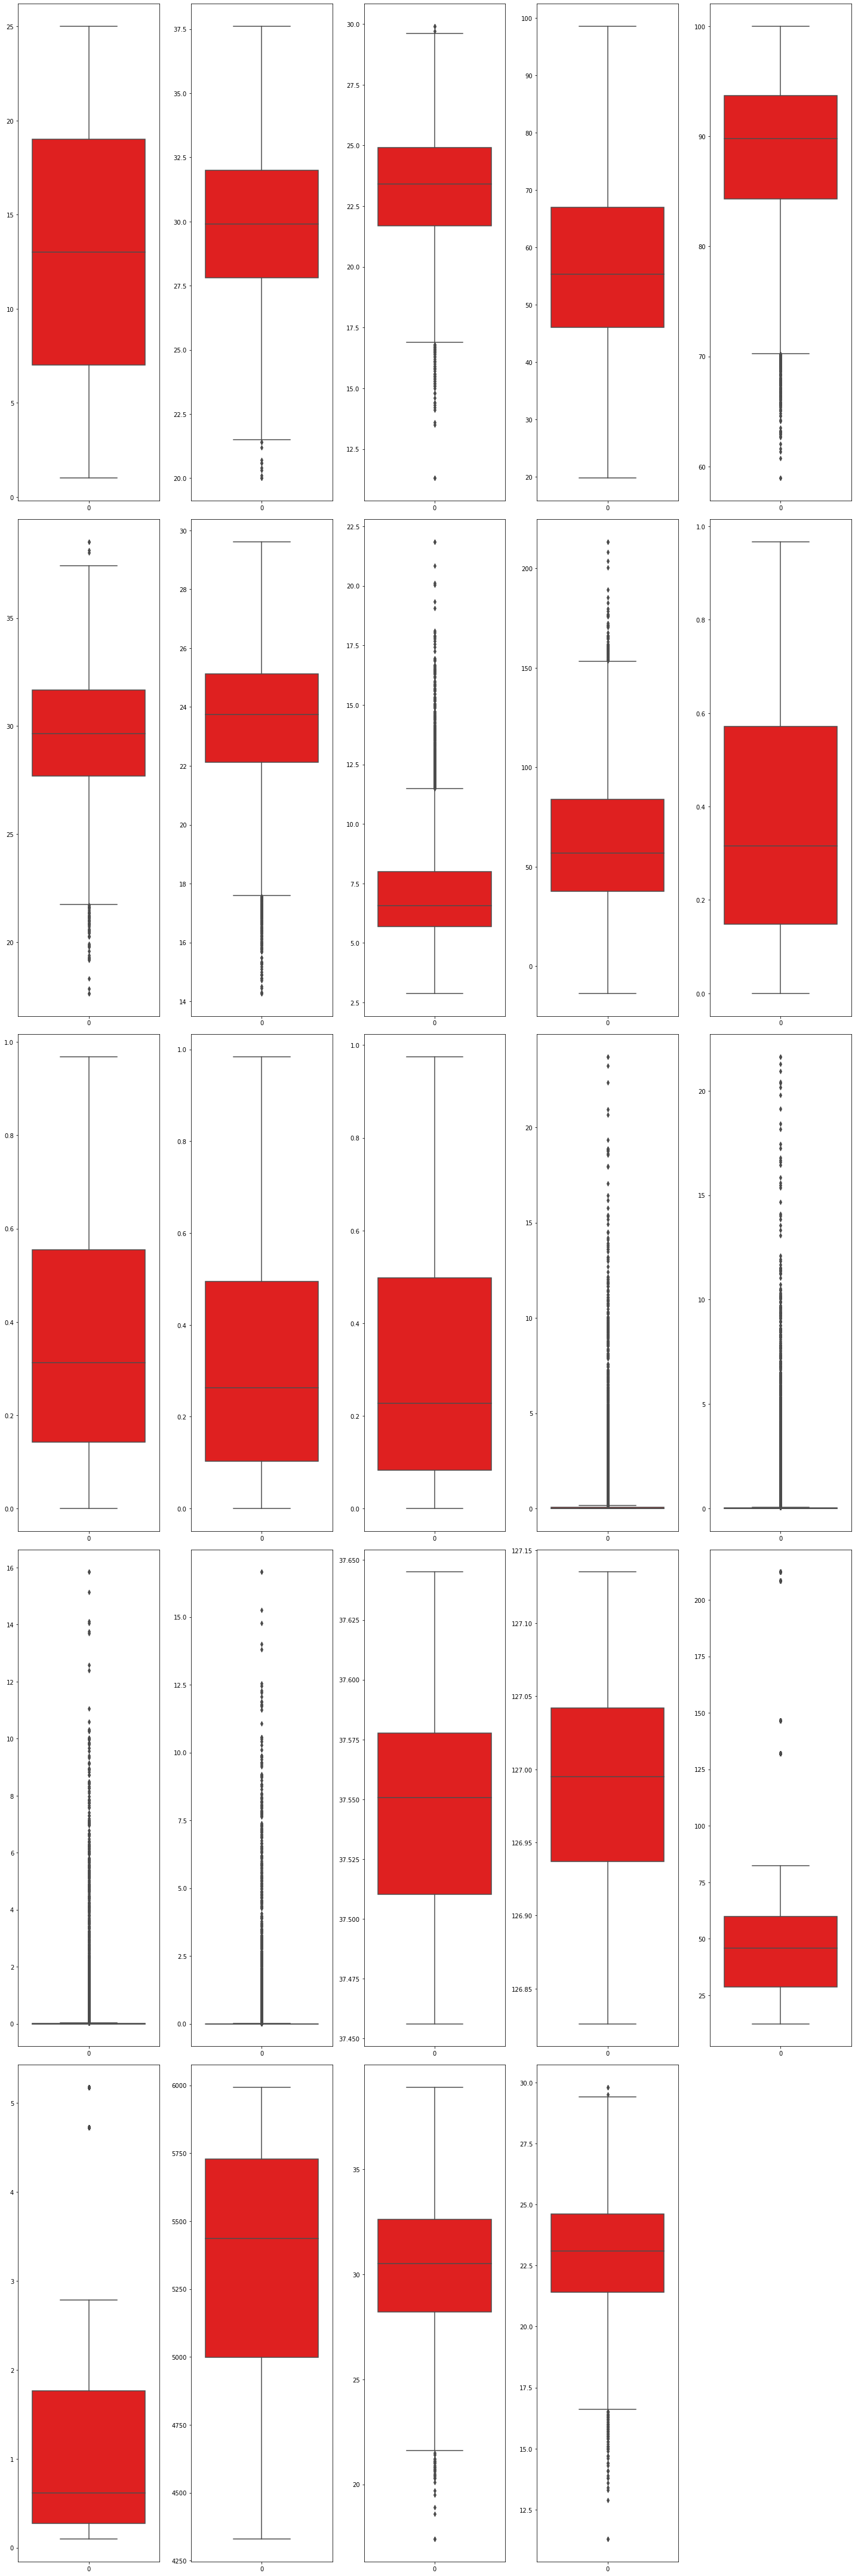

In [44]:
collist=df.drop(['Date'],axis=1).columns.values
ncol=20
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(5,5,i+1)
    sn.boxplot(data=df[collist[i]],color='red',orient='v')
    plt.tight_layout()

There are no considerable outliers as few columns have only outliers and if we treat them , we will loose our data more than 50% and hence we can't treat outliers here.

# Bivariate Analysis

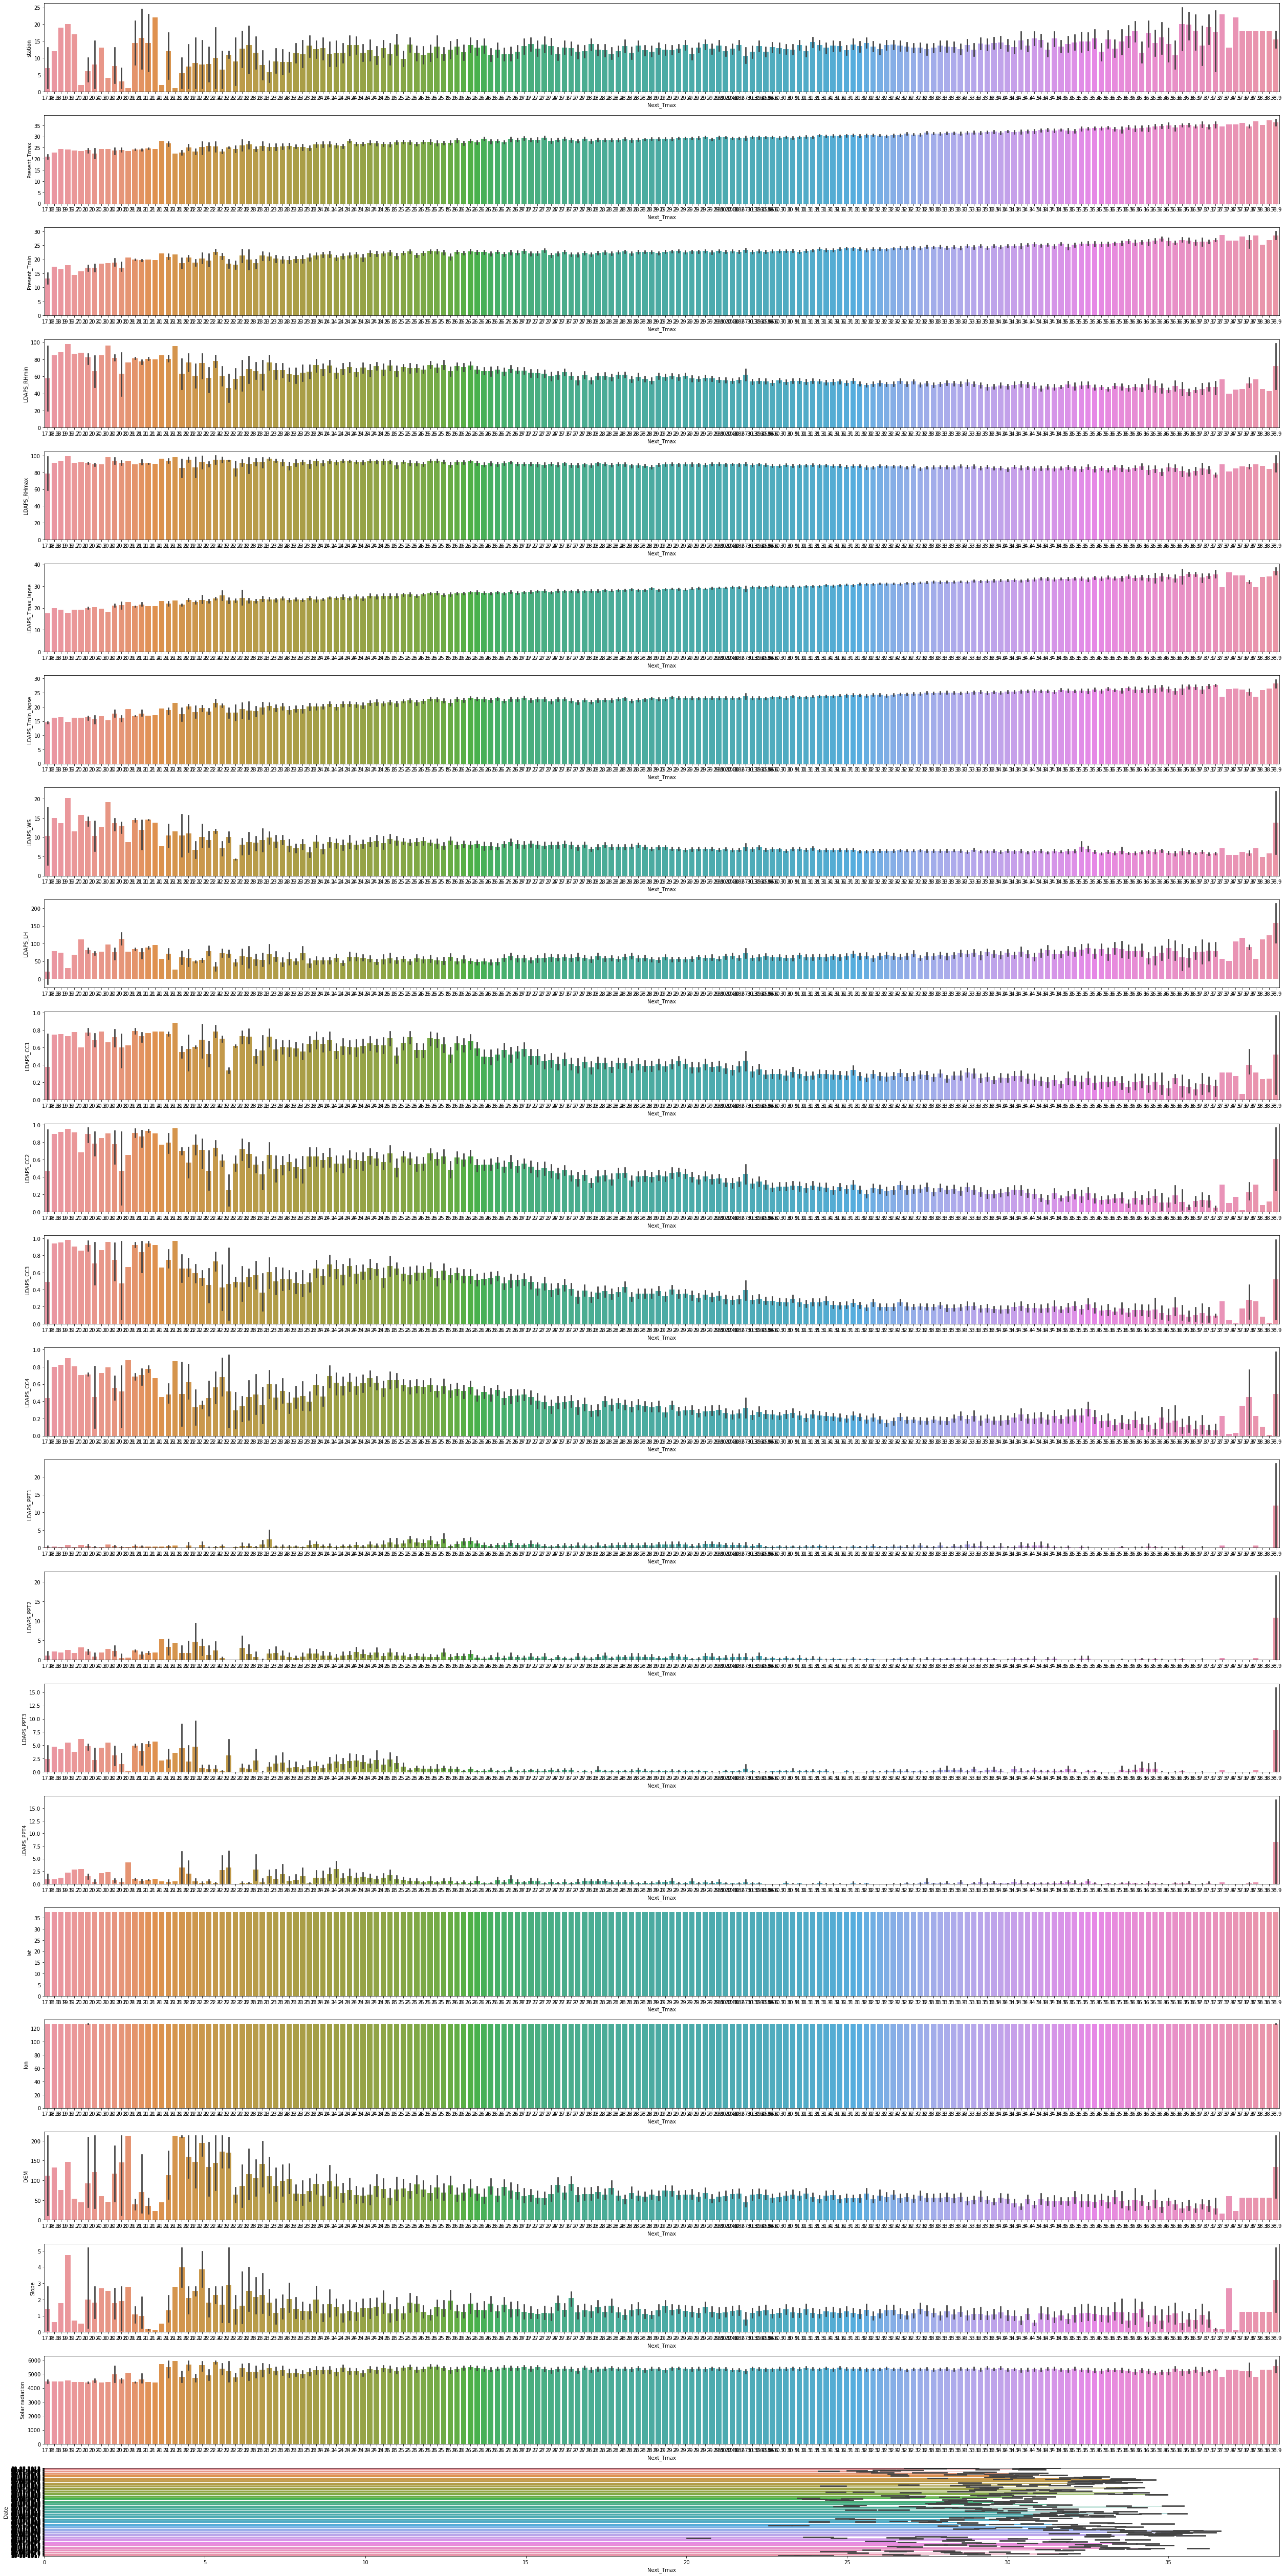

In [47]:
fig, axs = plt.subplots(23, figsize = (35,70))
plt1 = sn.barplot(y=df['station'], x=df['Next_Tmax'], ax = axs[0])
plt2 = sn.barplot(y=df['Present_Tmax'], x=df['Next_Tmax'], ax=axs[1])
plt3 = sn.barplot(y=df['Present_Tmin'], x=df['Next_Tmax'], ax=axs[2])
plt4 = sn.barplot(y=df['LDAPS_RHmin'], x=df['Next_Tmax'], ax=axs[3])
plt5 = sn.barplot(y=df['LDAPS_RHmax'], x=df['Next_Tmax'], ax=axs[4])
plt6 = sn.barplot(y=df['LDAPS_Tmax_lapse'], x=df['Next_Tmax'], ax=axs[5])
plt7 = sn.barplot(y=df['LDAPS_Tmin_lapse'], x=df['Next_Tmax'], ax=axs[6])
plt8 = sn.barplot(y=df['LDAPS_WS'], x=df['Next_Tmax'], ax=axs[7])
plt9 = sn.barplot(y=df['LDAPS_LH'], x=df['Next_Tmax'], ax=axs[8])
plt10 = sn.barplot(y=df['LDAPS_CC1'], x=df['Next_Tmax'],ax=axs[9])
plt11 = sn.barplot(y=df['LDAPS_CC2'], x=df['Next_Tmax'], ax=axs[10])
plt12 = sn.barplot(y=df['LDAPS_CC3'], x=df['Next_Tmax'], ax=axs[11])
plt13 = sn.barplot(y=df['LDAPS_CC4'], x=df['Next_Tmax'], ax=axs[12])
plt14 = sn.barplot(y=df['LDAPS_PPT1'], x=df['Next_Tmax'], ax=axs[13])
plt15 = sn.barplot(y=df['LDAPS_PPT2'], x=df['Next_Tmax'],ax=axs[14])
plt16 = sn.barplot(y=df['LDAPS_PPT3'], x=df['Next_Tmax'], ax=axs[15])
plt17 = sn.barplot(y=df['LDAPS_PPT4'], x=df['Next_Tmax'], ax=axs[16])
plt18 = sn.barplot(y=df['lat'], x=df['Next_Tmax'], ax=axs[17])
plt19 = sn.barplot(y=df['lon'], x=df['Next_Tmax'],ax=axs[18])
plt20 = sn.barplot(y=df['DEM'], x=df['Next_Tmax'], ax=axs[19])
plt21 = sn.barplot(y=df['Slope'], x=df['Next_Tmax'],ax=axs[20])
plt22 = sn.barplot(y=df['Solar radiation'], x=df['Next_Tmax'], ax=axs[21])
plt23 = sn.barplot(y=df['Date'], x=df['Next_Tmax'], ax=axs[22])
plt.tight_layout()

Since all the feature variables have a wide range of values , hence all the columns are important part for training the data. Let's study the scatter plot for second target variable. 

<AxesSubplot:xlabel='Next_Tmin', ylabel='station'>

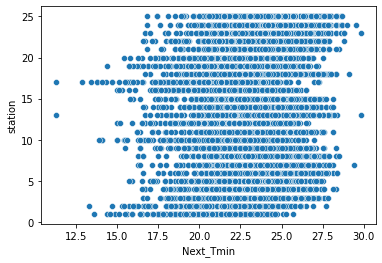

In [48]:
sn.scatterplot(y=df['station'], x=df['Next_Tmin'])

The data of station is scattered for all the ranges of temperature.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Present_Tmax'>

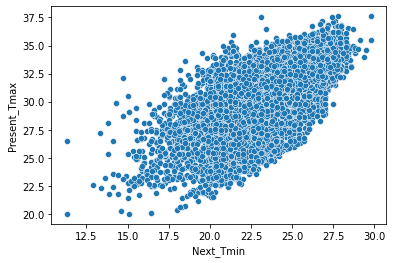

In [49]:
sn.scatterplot(y=df['Present_Tmax'], x=df['Next_Tmin'])

'Present_Tmax' is directly proportional to 'Next_Tmin'

<AxesSubplot:xlabel='Next_Tmin', ylabel='Present_Tmin'>

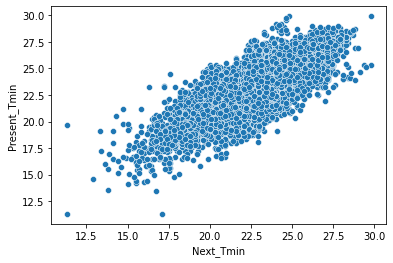

In [50]:
sn.scatterplot(y=df['Present_Tmin'], x=df['Next_Tmin'])

'Present_Tmin' is directly proportional to 'Next_Tmin'

<AxesSubplot:xlabel='Next_Tmin', ylabel='Date'>

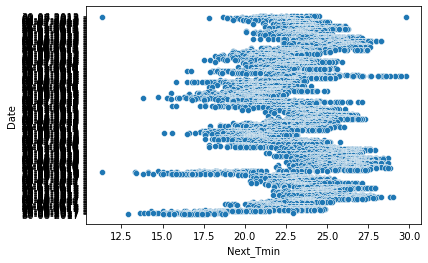

In [51]:
sn.scatterplot(y=df['Date'], x=df['Next_Tmin'])

Date has very wide range of data. It's hard to observe relationship between the two.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_RHmin'>

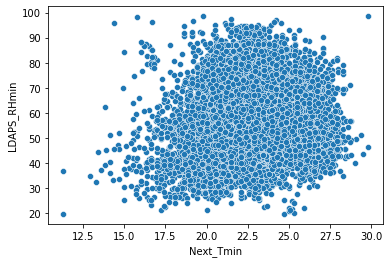

In [52]:
sn.scatterplot(y=df['LDAPS_RHmin'], x=df['Next_Tmin'])

This data is very much bounded.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_RHmax'>

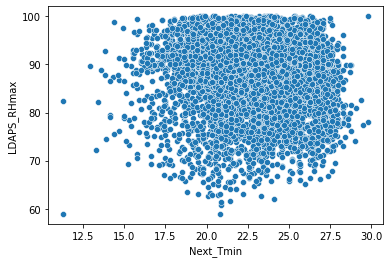

In [53]:
sn.scatterplot(y=df['LDAPS_RHmax'], x=df['Next_Tmin'])

The maximum spread of data for 'LDAPS_RHmax' is between 90-100

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_Tmax_lapse'>

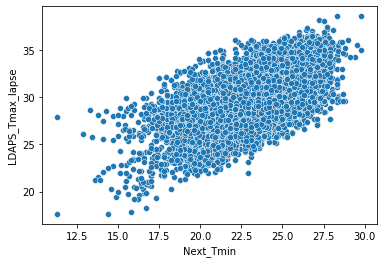

In [54]:
sn.scatterplot(y=df['LDAPS_Tmax_lapse'], x=df['Next_Tmin'])

They are directly proportional to each other.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_Tmin_lapse'>

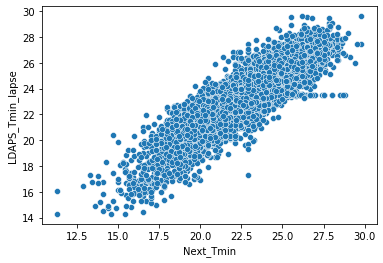

In [55]:
sn.scatterplot(y=df['LDAPS_Tmin_lapse'], x=df['Next_Tmin'])

They are directly proportional to each other, but with a negative intercept.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_WS'>

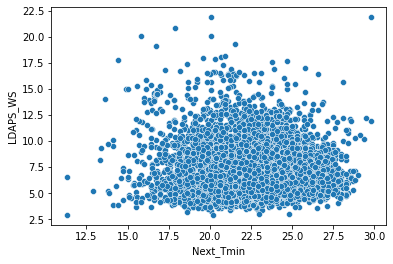

In [56]:
sn.scatterplot(y=df['LDAPS_WS'], x=df['Next_Tmin'])

The maximum data for 'LDAPS_WS' is spreaded between 5-10 

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_LH'>

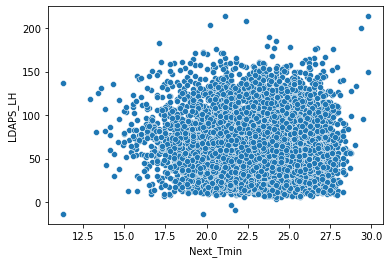

In [57]:
sn.scatterplot(y=df['LDAPS_LH'], x=df['Next_Tmin'])

This is very much bounded data.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_CC1'>

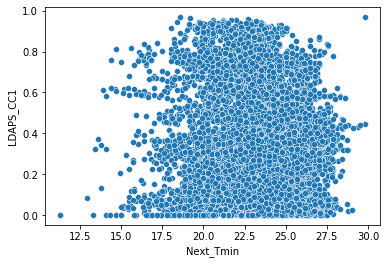

In [58]:
sn.scatterplot(y=df['LDAPS_CC1'], x=df['Next_Tmin'])

It has almost linear relationship with the target variable spreaded over a range of 20-25 Next_Tmin temperature.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_CC2'>

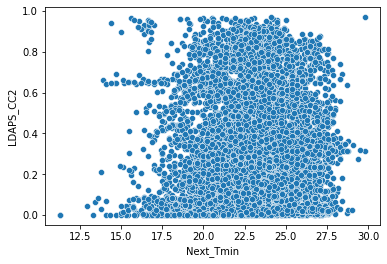

In [59]:
sn.scatterplot(y=df['LDAPS_CC2'], x=df['Next_Tmin'])

It has almost linear relationship with the target variable spreaded over a range of 20-27.5 Next_Tmin temperature.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_CC3'>

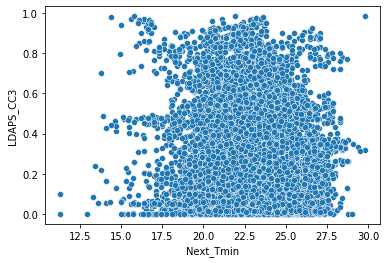

In [60]:
sn.scatterplot(y=df['LDAPS_CC3'], x=df['Next_Tmin'])

It has almost linear relationship with the target variable spreaded over a range of 20-25 Next_Tmin temperature.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_CC4'>

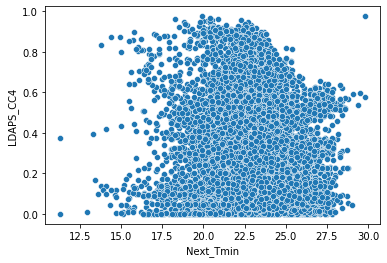

In [61]:
sn.scatterplot(y=df['LDAPS_CC4'], x=df['Next_Tmin'])

It has almost linear relationship with the target variable spreaded over a range of 20-22.5 Next_Tmin temperature.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_PPT1'>

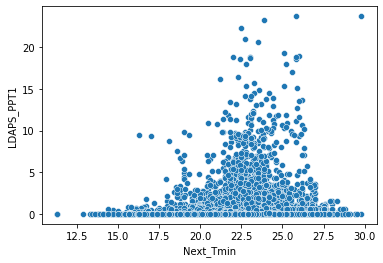

In [62]:
sn.scatterplot(y=df['LDAPS_PPT1'], x=df['Next_Tmin'])

The spread of data is very less. Maximum rows has 0 value.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_PPT2'>

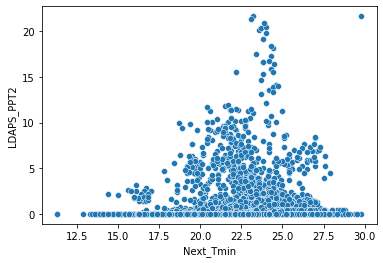

In [63]:
sn.scatterplot(y=df['LDAPS_PPT2'], x=df['Next_Tmin'])

The spread of data is very less. Maximum rows has 0 value.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_PPT3'>

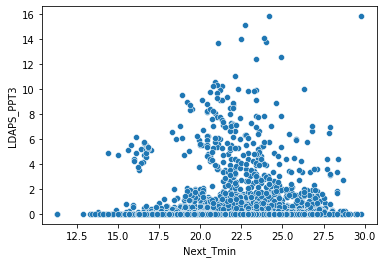

In [64]:
sn.scatterplot(y=df['LDAPS_PPT3'], x=df['Next_Tmin'])

The spread of data is very less. Maximum rows has 0 value.

<AxesSubplot:xlabel='Next_Tmin', ylabel='LDAPS_PPT4'>

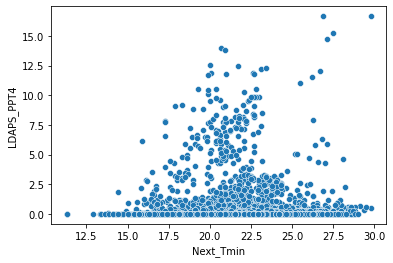

In [65]:
sn.scatterplot(y=df['LDAPS_PPT4'], x=df['Next_Tmin'])

The spread of data is very less. Maximum rows has 0 value.

<AxesSubplot:xlabel='Next_Tmin', ylabel='lat'>

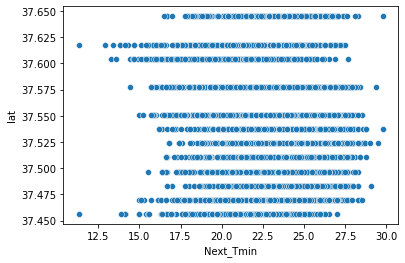

In [66]:
sn.scatterplot(y=df['lat'], x=df['Next_Tmin'])

The 'Next_Tmin' reaches every latitude.

<AxesSubplot:xlabel='Next_Tmin', ylabel='lon'>

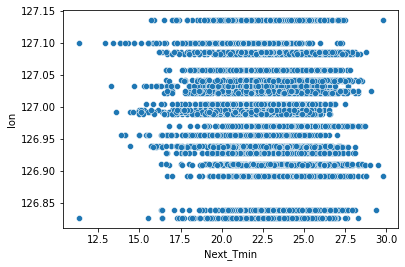

In [67]:
sn.scatterplot(y=df['lon'], x=df['Next_Tmin'])

The 'Next_Tmin' reaches every longitude.

<AxesSubplot:xlabel='Next_Tmin', ylabel='DEM'>

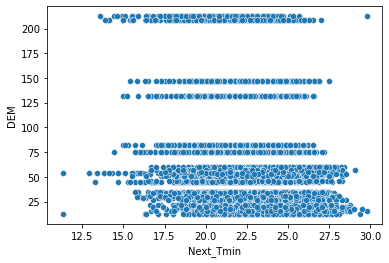

In [68]:
sn.scatterplot(y=df['DEM'], x=df['Next_Tmin'])

The maximum spread of 'DEM' is between 0-75.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Slope'>

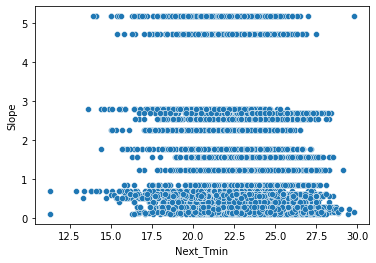

In [69]:
sn.scatterplot(y=df['Slope'], x=df['Next_Tmin'])

The maximum spread of slope is between 0 to 1.

<AxesSubplot:xlabel='Next_Tmin', ylabel='Solar radiation'>

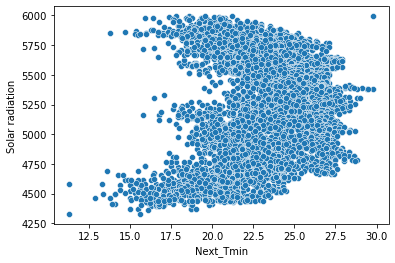

In [70]:
sn.scatterplot(y=df['Solar radiation'], x=df['Next_Tmin'])

This curve represents a parabolic symbol. Hence Tmin keeps swinging between max and min solar radiation.

# Multivariate Analysis

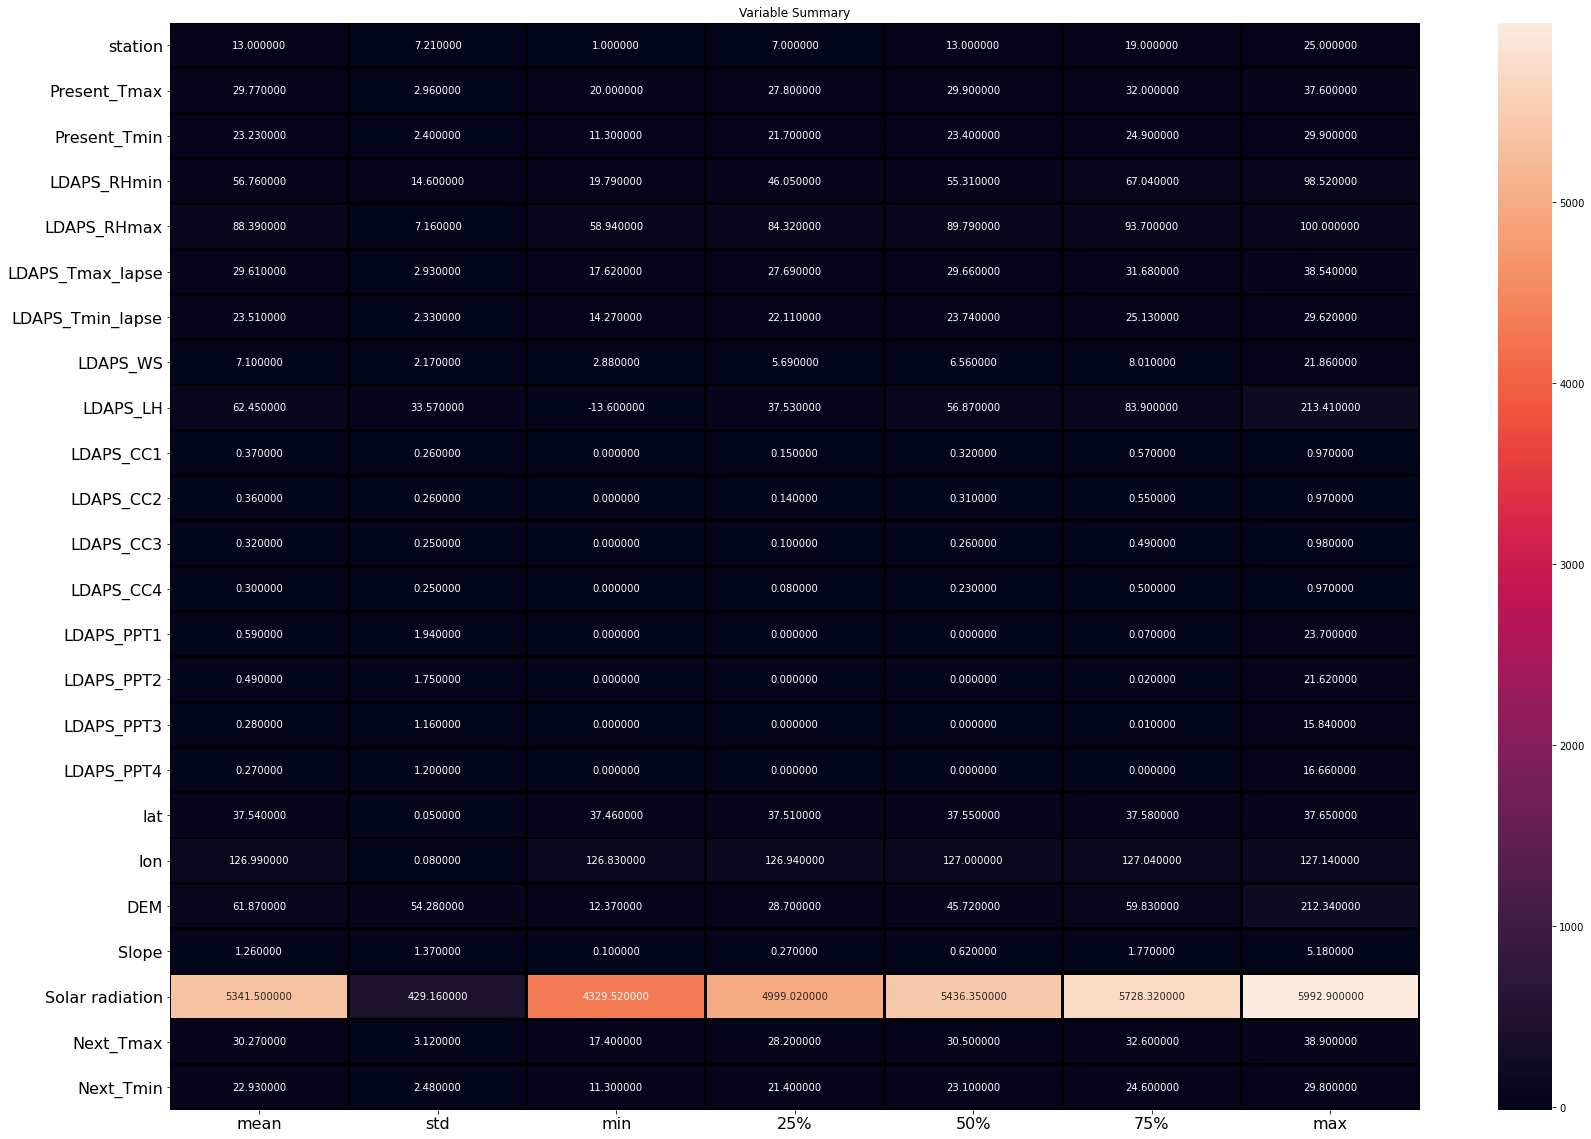

In [71]:
plt.figure(figsize=(28,20))
sn.heatmap(round(df.describe()[1:].transpose(),2),lw=2,linecolor='black',annot=True,fmt='f',color='red')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Variable Summary')
plt.show()

From the above plot we are determining mean, standard deviation, median, minimum and maximum of each column.

<AxesSubplot:>

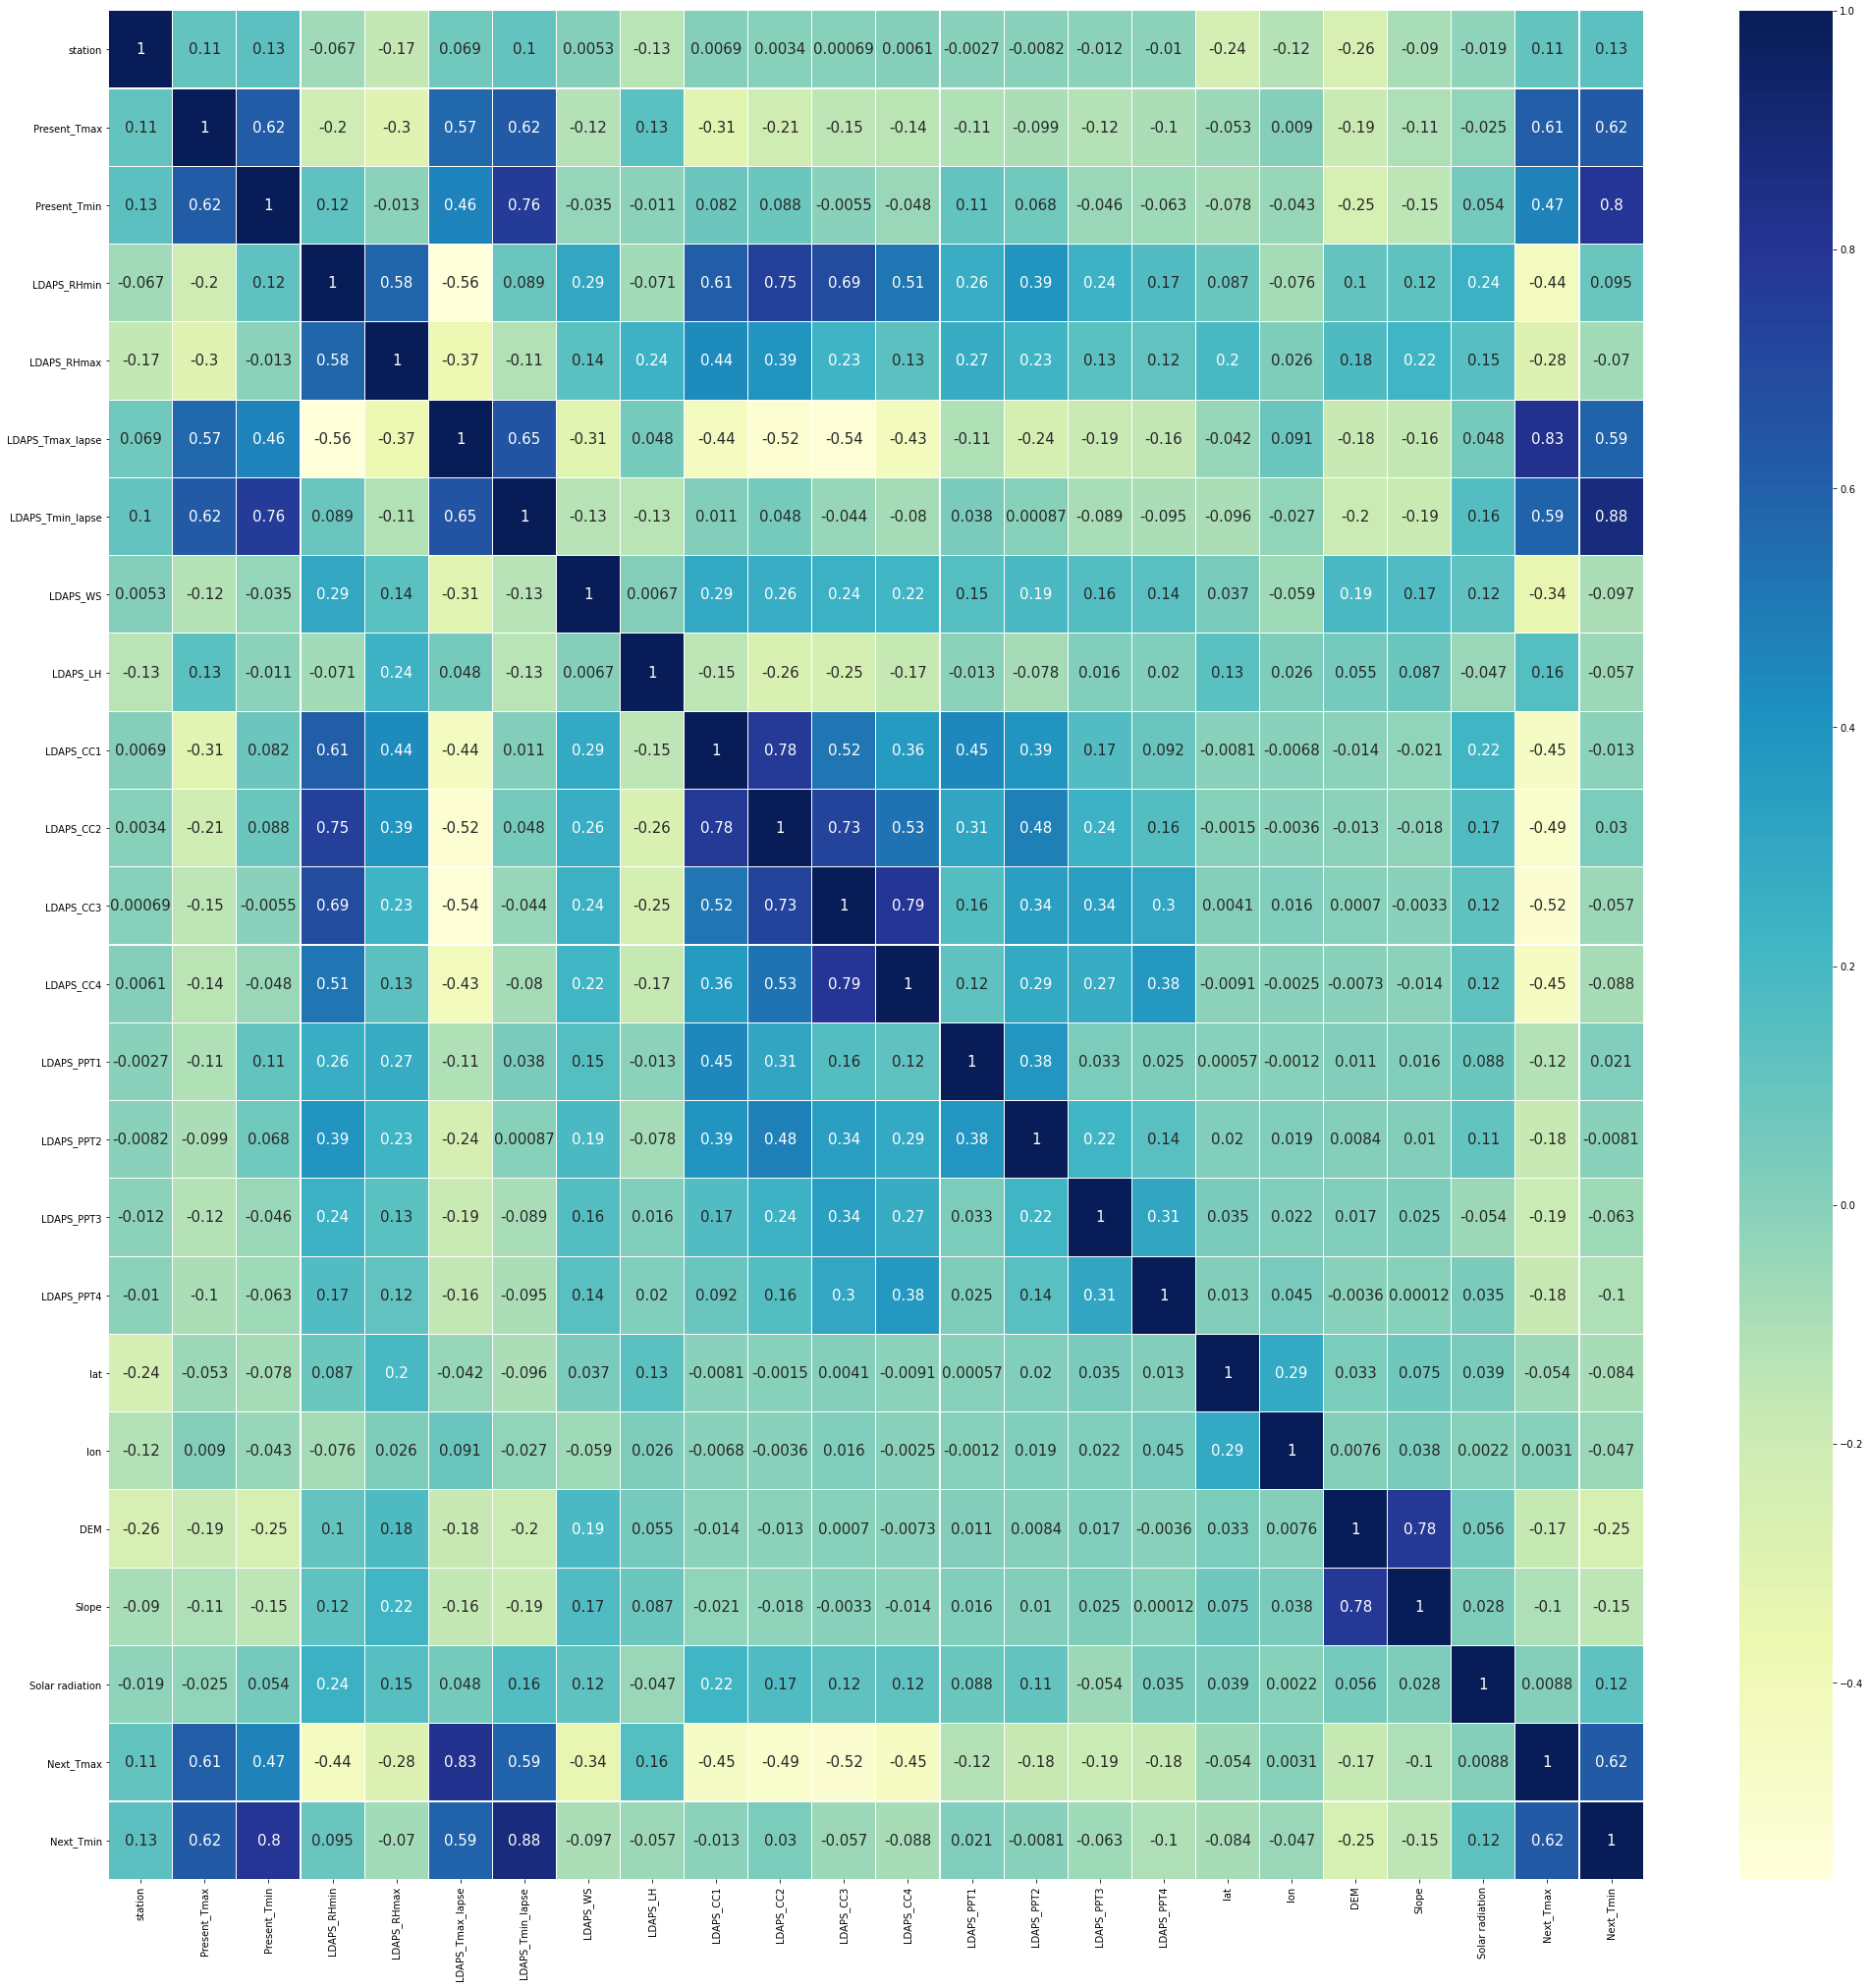

In [72]:
a=df.corr()
plt.figure(figsize=(35,35))
sn.heatmap(a, linewidth=0.1, cmap="YlGnBu", annot = True, annot_kws={"size":15})

There does not exist any considerable multicollinearity in the dataset. 

# Data Cleaning

In [73]:
from sklearn.preprocessing import power_transform

Importing library for power transformation

In [74]:
a=df.drop(['Next_Tmax','Next_Tmin','Date'],axis=1)
a=power_transform(a,method='yeo-johnson')
a

array([[-1.86035552, -0.40889726, -0.79770658, ...,  1.83497751,
         1.31415303,  1.8494304 ],
       [-1.64838475,  0.70512271, -0.72013038, ...,  0.05597899,
        -0.38533562,  1.40070208],
       [-1.4548483 ,  0.59569241, -0.02767423, ..., -0.36457492,
        -0.94916364,  1.38064953],
       ...,
       [ 1.54118849, -2.04992031, -2.18006638, ..., -1.19312415,
        -0.93504362, -1.74476253],
       [ 0.0770875 , -2.84618687, -3.68800537, ..., -1.98514427,
        -1.47726373, -1.88707057],
       [ 0.0770875 ,  2.9810374 ,  3.23307848, ...,  1.83497751,
         1.74216318,  1.8494304 ]])

We have applied power transformation on the columns that had skewness.

In [75]:
x= df.iloc[:,0:-2]
y = df.iloc[:,-2:]

Separating feature and target variables into x and y respectively.

In [76]:
le = LabelEncoder() 
df['Date']=le.fit_transform(df['Date'])
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,290,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,290,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,290,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,290,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,290,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,304,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,304,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,304,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,13.0,0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Label Encoding the datas of column 'Date'.

In [77]:
x= df.iloc[:,0:-2]    #updating label encoded values of date column for scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x=scale.fit_transform(x)

Scaling the feature variables

# Model Building

In [78]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)
lr= LinearRegression()
lr.fit(xtrain,ytrain)
lr.coef_
pred_train=lr.predict(xtrain)
pred_test=lr.predict(xtest)
print('r2_score of Linear Regression:',(r2_score(ytest,pred_test))*100,'%')

dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
dtrpredict=dtr.predict(xtest)
print('r2_score of DecisionTree Regressor:',(r2_score(ytest,dtrpredict))*100,'%')

knr = KNeighborsRegressor()
knr.fit(xtrain,ytrain)
knrpredict=knr.predict(xtest)
print("r2_score of Kneighbors Regressor:",(r2_score(ytest,knrpredict))*100,'%')

from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(xtrain,ytrain)
rfrpredict=rfr.predict(xtest)
print('r2_score of RandomForestRegressor: ',(r2_score(ytest,rfrpredict))*100,'%')

r2_score of Linear Regression: 80.82138200298849 %
r2_score of DecisionTree Regressor: 77.92248878048096 %
r2_score of Kneighbors Regressor: 86.37963373602867 %
r2_score of RandomForestRegressor:  90.67335503015336 %


We printed the r2_score of all the 4 models we have used here. The Accuracy of RandomForestRegressor is maximum.

# Cross Validation Score

In [79]:
from sklearn.model_selection import cross_val_score as cvs
print("CVS for Linear Regression =",cvs(lr,x,y,cv=5).mean()*100,"%")
print("CVS for DecisionTree regressor  =",cvs(dtr,x,y,cv=5).mean()*100,"%")
print("CVS for K-Neighbor regressor =",cvs(knr,x,y,cv=5).mean()*100,"%")
print("CVS for Random Forest Regressor =",cvs(rfr,x,y,cv=5).mean()*100,"%")

CVS for Linear Regression = 60.89450932880507 %
CVS for DecisionTree regressor  = 44.17546167086883 %
CVS for K-Neighbor regressor = 59.083842672071896 %
CVS for Random Forest Regressor = 71.10880884658994 %


The least difference between r2_score and CVS is for RandomForestRegressor and hence we will go with the RandomForestRegressor.

# Hyper Parameter Tuning

In [80]:
parameter = { 'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],}

gvc = GridSearchCV(RandomForestRegressor(),parameter,cv=5)
gvc.fit(xtrain,ytrain)
gvc.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

Getting the best parameters for Final Model Building.

In [81]:
temp = RandomForestRegressor(bootstrap=False,min_samples_leaf=1,max_features='sqrt',min_samples_split=2)
temp.fit(xtrain,ytrain)
pred=temp.predict(xtest)
acc=r2_score(ytest,pred)
print('Accuracy for predicting temperature is', (acc*100),'%')

Accuracy for predicting temperature is 92.72594994907412 %


Accuracy of Final model is 92.72% which is very good.

# Saving The Best Model

In [82]:
import pickle
filename = 'Temperature.pkl'
pickle.dump(temp,open(filename,'wb'))

We have saved the best model.

# Conclusion

In [83]:
t=pd.DataFrame({"Original_Tmax":a[:,1],"Predicted_Tmax":predicted[:,0], "Original_Tmin":a[:,1],"Predicted_Tmin":predicted[:,1]},index=range(len(a)))
t

,Original_Tmax,Predicted_Tmax,Original_Tmin,Predicted_Tmin
0,20.3,20.650000,20.3,20.425000
1,27.5,28.946000,27.5,27.293000
2,21.2,22.185000,21.2,21.211000
3,25.2,24.420000,25.2,24.976000
4,26.0,26.241000,26.0,25.978000
...,...,...,...,...
1546,21.7,23.071000,21.7,22.337000
1547,22.4,24.215000,22.4,23.299000
1548,22.3,25.120498,22.3,22.577644
1549,19.5,20.697000,19.5,19.988000


We can see that the predicted values are almost equal to the actual values . Hence we conclude that our model is working very fine.